### **Import Library**

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

# Mengabaikan warning yang sering muncul dari statsmodels untuk data kecil
warnings.filterwarnings("ignore")

### **Import Data Hasil Rules**

In [2]:
df = pd.read_csv('data/rules2024.csv')
df

,Unnamed: 0,antecedents,consequents,support,confidence,lift
0,0,"frozenset({'SAKINAH 1500ML', 'GREENFIELDS COKL...",frozenset({'GREENFIELDS STRAW 105ML'}),0.000109,1,4922.846154
1,1,"frozenset({'BISKUAT BOLU CKL 16GR', 'INDOMILK ...","frozenset({'INDOMILK KID VNL 115ML', 'CLOUD 9 ...",0.000141,1,2206.793103
2,2,"frozenset({'GATSBY SPL/C GS 175ML', 'FRESHCARE...",frozenset({'GATSBY SPL/C DO 175ML'}),0.000141,1,1185.129630
3,3,"frozenset({'KISPRAY POUCH GLAM/GLD 300ML', 'IN...",frozenset({'SOKLIN LIQ LAVENDER 625ML'}),0.000109,1,831.129870
4,4,"frozenset({'SEDAAP MIE CUP BASO BLEDUK', 'SEDA...",frozenset({'SEDAAP MIE CUP SOTO'}),0.000125,1,780.451220
5,5,"frozenset({'SEDAAP MIE CUP AYM JERIT /12', 'SE...",frozenset({'SEDAAP MIE CUP SOTO'}),0.000109,1,780.451220
6,6,"frozenset({'ATTACK JAZ 1 CINTA 1 6 KG', 'NUVO ...",frozenset({'NUVO SOAP BLUE 72G'}),0.000109,1,484.825758
7,7,"frozenset({'BISKUAT BOLU CKL 16GR', 'INDOMILK ...",frozenset({'CLOUD 9 VANILA 15 4G'}),0.000141,1,378.680473
8,8,"frozenset({'BISKUAT BOLU CKL 16GR', 'INDOMILK ...",frozenset({'CLOUD 9 VANILA 15 4G'}),0.000141,1,378.680473
9,9,"frozenset({'DELFI TOP TRIP/CHO 9GR', 'MOMOGI J...",frozenset({'DELFI TOP B/WHITE 9GR'}),0.000109,1,353.574586


In [3]:
# Pastikan semua elemen dalam kolom antecedents dan consequents adalah frozenset
df["antecedents"] = df["antecedents"].apply(lambda x: frozenset(eval(x)) if isinstance(x, str) else x)
df["consequents"] = df["consequents"].apply(lambda x: frozenset(eval(x)) if isinstance(x, str) else x)

# Mengambil semua item unik
all_items = set()
for col in ["antecedents", "consequents"]:
    for items in df[col]:
        all_items.update(items)

all_items

{'ADEM SARI CHINGKU MD LMN 350ML',
 'ATTACK JAZ 1 CINTA 1 6 KG',
 'BISKUAT BOLU CKL 16GR',
 'CLOUD 9 CHOCO 15 4G',
 'CLOUD 9 VANILA 15 4G',
 'DAIA LEMON 65GR',
 'DELFI TOP B/WHITE 9GR',
 'DELFI TOP CHO 9GR',
 'DELFI TOP STR 9GR',
 'DELFI TOP TRIP/CHO 9GR',
 'EKONOMI LIQUID REFF 235ML',
 'FRESHCARE ORIGINAL 10ML',
 'GATSBY SPL/C DO 175ML',
 'GATSBY SPL/C GS 175ML',
 'GREENFIELDS COKLAT 105ML',
 'GREENFIELDS STRAW 105ML',
 'INDOMIE GRG SPECIAL',
 'INDOMIE RAMEN TORI KARA/20',
 'INDOMIE SOTO MIE',
 'INDOMILK KID CKL 115ML',
 'INDOMILK KID STR 115ML',
 'INDOMILK KID VNL 115ML',
 'KISPRAY POUCH GLAM/GLD 300ML',
 'MAMA LEMON 115ML',
 'MOMOGI JGG BKR 6GR',
 'MR POTATO CRIPS ORI 35G',
 'NEXTAR BROWNIES 42GR',
 'NEXTAR PINEAPLE 112G',
 'NUVO SOAP BLUE 72G',
 'NUVO SOAP RED 72G',
 'ROMA KELAPA 300GR',
 'SAKINAH 1500ML',
 'SEDAAP MIE AYAM BWG',
 'SEDAAP MIE CUP AYM JERIT /12',
 'SEDAAP MIE CUP BASO BLEDUK',
 'SEDAAP MIE CUP BASO SPC',
 'SEDAAP MIE CUP KARE',
 'SEDAAP MIE CUP SOTO',
 'SEDAAP MIE S

### **Import Data Transaksi**

In [4]:
groceries = pd.read_excel('data/final_data2024.xlsx')
groceries

,TANGGAL,NO TRANSAKSI,NAMA BARANG,QTY
0,2024-01-01,2401011010001,GULA ROSE BRAND 1KG,1
1,2024-01-01,2401011010002,RIZKI MG 850ML/900ML BTL,3
2,2024-01-01,2401011010003,ULTRA MIMI VNL 125ML,1
3,2024-01-01,2401011010003,BEAR BRAND 189ML,1
4,2024-01-01,2401011010003,TINI WINI BITI ASIN 20 GR,1
...,...,...,...,...
167618,2024-12-31,2412311020122,WALLS POPULAIRE CKL,1
167619,2024-12-31,2412311020123,THERMAL 80X50 TRUST PAPER,1
167620,2024-12-31,2412311020124,SAKINAH 600ML,1
167621,2024-12-31,2412311020124,WALLS PP RAINBOW P,1


### **Filter Data Transaksi**

In [5]:
df_filtered = groceries[groceries['NAMA BARANG'].isin(all_items)]
df_filtered 

,TANGGAL,NO TRANSAKSI,NAMA BARANG,QTY
20,2024-01-01,2401011010011,INDOMIE GRG SPECIAL,1
32,2024-01-01,2401011010015,EKONOMI LIQUID REFF 235ML,1
55,2024-01-01,2401011010017,ROMA KELAPA 300GR,1
59,2024-01-01,2401011010018,INDOMILK KID VNL 115ML,1
73,2024-01-01,2401011010023,ROMA KELAPA 300GR,1
...,...,...,...,...
167537,2024-12-31,2412311020090,INDOMILK KID CKL 115ML,1
167552,2024-12-31,2412311020096,INDOMIE RAMEN TORI KARA/20,1
167607,2024-12-31,2412311020118,INDOMILK KID STR 115ML,1
167608,2024-12-31,2412311020118,INDOMILK KID VNL 115ML,1


In [6]:
# Menampilkan jumlah unik nama barang
jumlah_nama_barang = df_filtered['NAMA BARANG'].nunique()
print("Jumlah nama barang unik:", jumlah_nama_barang)

# Menampilkan isi nama barang yang unik
nama_barang_unik = df_filtered['NAMA BARANG'].unique()
print("Nama barang unik:")
for nama in nama_barang_unik:
    print("-", nama)

Jumlah nama barang unik: 45
Nama barang unik:
- INDOMIE GRG SPECIAL
- EKONOMI LIQUID REFF 235ML
- ROMA KELAPA 300GR
- INDOMILK KID VNL 115ML
- SEDAAP MIE AYAM BWG
- SEDAAP MIE SOTO
- ATTACK JAZ 1 CINTA 1 6 KG
- WALLS POPULAIRE CKL
- MAMA LEMON 115ML
- WALLS CORN STRW VANILA
- DELFI TOP CHO 9GR
- DELFI TOP STR 9GR
- DELFI TOP B/WHITE 9GR
- SEDAAP MIE CUP SOTO
- SEDAAP MIE CUP KARE
- DELFI TOP TRIP/CHO 9GR
- DAIA LEMON 65GR
- NUVO SOAP RED 72G
- NUVO SOAP BLUE 72G
- SEDAAP MIE CUP AYM JERIT /12
- SEDAAP MIE CUP BASO BLEDUK
- WALLS CORN B/WHITE 82GR
- BISKUAT BOLU CKL 16GR
- INDOMIE SOTO MIE
- SOKLIN LIQ LAVENDER 625ML
- INDOMILK KID STR 115ML
- WALLS POPULAIRE STR
- SAKINAH 1500ML
- KISPRAY POUCH GLAM/GLD 300ML
- MR POTATO CRIPS ORI 35G
- INDOMILK KID CKL 115ML
- GATSBY SPL/C DO 175ML
- GATSBY SPL/C GS 175ML
- FRESHCARE ORIGINAL 10ML
- INDOMIE RAMEN TORI KARA/20
- NEXTAR BROWNIES 42GR
- CLOUD 9 VANILA 15 4G
- TEH GELAS ORI 170ML
- CLOUD 9 CHOCO 15 4G
- NEXTAR PINEAPLE 112G
- SEDAAP MIE C

### **Agregasi Data Mingguan**

In [7]:
# Agregasi jumlah QTY per tanggal dan nama barang
df_grouped = df_filtered.groupby(['TANGGAL', 'NAMA BARANG'], as_index=False)['QTY'].sum()

tanggal_range = pd.date_range(start='2024-01-01', end='2024-12-31')
all_items = df_filtered['NAMA BARANG'].unique()

# Buat kombinasi semua tanggal dan item
multi_index = pd.MultiIndex.from_product([tanggal_range, all_items], names=['TANGGAL', 'NAMA BARANG'])
all_combinations = pd.DataFrame(index=multi_index).reset_index()

# Gabungkan dengan hasil groupby
df_joined = pd.merge(all_combinations, df_grouped, on=['TANGGAL', 'NAMA BARANG'], how='left')
df_joined['QTY'] = df_joined['QTY'].fillna(0)

# Pastikan TANGGAL dalam datetime
df_joined['TANGGAL'] = pd.to_datetime(df_joined['TANGGAL'])

# Urutkan dulu datanya
df_joined = df_joined.sort_values('TANGGAL')

# Ambil tanggal paling awal
start_date = df_joined['TANGGAL'].min()

# Hitung minggu ke-n secara manual (tiap 7 hari)
df_joined['WEEK_NUMBER'] = ((df_joined['TANGGAL'] - start_date).dt.days // 7) + 1

# Agregasi berdasarkan minggu dan nama barang
df_weekly = df_joined.groupby(['WEEK_NUMBER', 'NAMA BARANG'], as_index=False)['QTY'].sum()

# (Opsional) Tambahkan kolom tanggal mulai minggu
df_weekly['TANGGAL'] = start_date + pd.to_timedelta((df_weekly['WEEK_NUMBER'] - 1) * 7, unit='D')

# Visualisasi
fig = px.line(df_weekly, x='TANGGAL', y='QTY', color='NAMA BARANG',
              title='Jumlah Penjualan per Minggu (Setiap 7 Hari)')
fig.update_layout(legend_title_text='Klik untuk tampilkan/sembunyikan item')
fig.show()

In [8]:
df_weekly

,WEEK_NUMBER,NAMA BARANG,QTY,TANGGAL
0,1,ADEM SARI CHINGKU MD LMN 350ML,0.0,2024-01-01
1,1,ATTACK JAZ 1 CINTA 1 6 KG,10.0,2024-01-01
2,1,BISKUAT BOLU CKL 16GR,5.0,2024-01-01
3,1,CLOUD 9 CHOCO 15 4G,3.0,2024-01-01
4,1,CLOUD 9 VANILA 15 4G,4.0,2024-01-01
...,...,...,...,...
2380,53,TEH GELAS ORI 170ML,0.0,2024-12-30
2381,53,WALLS CORN B/WHITE 82GR,0.0,2024-12-30
2382,53,WALLS CORN STRW VANILA,0.0,2024-12-30
2383,53,WALLS POPULAIRE CKL,9.0,2024-12-30


### **Pivot Data**

In [9]:
df_pivoted= df_weekly.pivot(index='TANGGAL', columns='NAMA BARANG', values='QTY')
df_pivoted.columns.name = None  # hilangkan nama kolom atas
df_pivoted = df_pivoted.reset_index() 
df_pivoted

,TANGGAL,ADEM SARI CHINGKU MD LMN 350ML,ATTACK JAZ 1 CINTA 1 6 KG,BISKUAT BOLU CKL 16GR,CLOUD 9 CHOCO 15 4G,CLOUD 9 VANILA 15 4G,DAIA LEMON 65GR,DELFI TOP B/WHITE 9GR,DELFI TOP CHO 9GR,DELFI TOP STR 9GR,...,SEDAAP MIE CUP BASO SPC,SEDAAP MIE CUP KARE,SEDAAP MIE CUP SOTO,SEDAAP MIE SOTO,SOKLIN LIQ LAVENDER 625ML,TEH GELAS ORI 170ML,WALLS CORN B/WHITE 82GR,WALLS CORN STRW VANILA,WALLS POPULAIRE CKL,WALLS POPULAIRE STR
0,2024-01-01,0.0,10.0,5.0,3.0,4.0,5.0,6.0,8.0,5.0,...,0.0,2.0,5.0,38.0,2.0,3.0,17.0,2.0,10.0,4.0
1,2024-01-08,10.0,0.0,4.0,7.0,1.0,2.0,7.0,4.0,4.0,...,2.0,3.0,1.0,16.0,2.0,5.0,12.0,4.0,3.0,4.0
2,2024-01-15,8.0,0.0,7.0,5.0,7.0,0.0,3.0,1.0,3.0,...,2.0,3.0,2.0,20.0,0.0,4.0,3.0,0.0,7.0,7.0
3,2024-01-22,2.0,1.0,5.0,5.0,7.0,2.0,4.0,2.0,0.0,...,2.0,2.0,0.0,32.0,1.0,10.0,22.0,5.0,7.0,6.0
4,2024-01-29,0.0,5.0,0.0,10.0,7.0,3.0,9.0,10.0,5.0,...,2.0,0.0,2.0,16.0,2.0,9.0,8.0,2.0,8.0,5.0
5,2024-02-05,2.0,0.0,1.0,10.0,6.0,5.0,3.0,10.0,2.0,...,2.0,0.0,3.0,24.0,1.0,4.0,15.0,1.0,4.0,6.0
6,2024-02-12,1.0,0.0,0.0,3.0,2.0,3.0,4.0,5.0,6.0,...,2.0,3.0,2.0,16.0,0.0,5.0,3.0,2.0,9.0,7.0
7,2024-02-19,4.0,0.0,2.0,1.0,5.0,3.0,1.0,6.0,12.0,...,0.0,3.0,1.0,22.0,2.0,8.0,9.0,3.0,5.0,7.0
8,2024-02-26,1.0,6.0,3.0,2.0,3.0,0.0,6.0,17.0,9.0,...,2.0,3.0,3.0,20.0,2.0,6.0,6.0,3.0,5.0,2.0
9,2024-03-04,2.0,3.0,3.0,7.0,7.0,17.0,4.0,2.0,9.0,...,0.0,3.0,4.0,11.0,4.0,4.0,5.0,1.0,5.0,13.0


In [10]:
# 1. Pisahkan kolom tanggal dan kolom produk
produk_df = df_pivoted.drop(columns=["TANGGAL"])

# 2. Hitung jumlah 0 per kolom
zero_counts = (produk_df == 0).sum()

# 3. Ambil item yang jumlah 0-nya <= 5
filtered_items = zero_counts[zero_counts <= 5].index

# 4. Filter dataframe hanya dengan item yang lolos kriteria 0
filtered_df = produk_df[filtered_items]

# 5. Hitung total penjualan per item
total_sales = filtered_df.sum().sort_values(ascending=False).index

# 6. Ambil 15 item dengan total penjualan tertinggi
# top_3_items = total_sales.head(15).index

# 7. Final dataframe dengan 15 item terbaik
df_final = df_pivoted[["TANGGAL"] + total_sales.tolist()]

In [11]:
df_final.head()

,TANGGAL,INDOMIE GRG SPECIAL,INDOMILK KID CKL 115ML,SEDAAP MIE SOTO,SAKINAH 1500ML,INDOMILK KID VNL 115ML,INDOMILK KID STR 115ML,INDOMIE SOTO MIE,SEDAAP MIE AYAM BWG,EKONOMI LIQUID REFF 235ML,WALLS CORN B/WHITE 82GR,WALLS POPULAIRE CKL,WALLS POPULAIRE STR,MAMA LEMON 115ML,DELFI TOP CHO 9GR,ROMA KELAPA 300GR,DELFI TOP B/WHITE 9GR,BISKUAT BOLU CKL 16GR,DELFI TOP STR 9GR
0,2024-01-01,129.0,3.0,38.0,6.0,8.0,3.0,18.0,14.0,9.0,17.0,10.0,4.0,3.0,8.0,12.0,6.0,5.0,5.0
1,2024-01-08,119.0,12.0,16.0,6.0,13.0,14.0,13.0,1.0,6.0,12.0,3.0,4.0,6.0,4.0,8.0,7.0,4.0,4.0
2,2024-01-15,88.0,13.0,20.0,5.0,10.0,10.0,16.0,9.0,4.0,3.0,7.0,7.0,7.0,1.0,6.0,3.0,7.0,3.0
3,2024-01-22,147.0,18.0,32.0,8.0,14.0,16.0,19.0,3.0,6.0,22.0,7.0,6.0,8.0,2.0,3.0,4.0,5.0,0.0
4,2024-01-29,114.0,20.0,16.0,4.0,19.0,22.0,15.0,5.0,11.0,8.0,8.0,5.0,7.0,10.0,6.0,9.0,0.0,5.0


In [12]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   TANGGAL                    53 non-null     datetime64[ns]
 1   INDOMIE GRG SPECIAL        53 non-null     float64       
 2   INDOMILK KID CKL 115ML     53 non-null     float64       
 3   SEDAAP MIE SOTO            53 non-null     float64       
 4   SAKINAH 1500ML             53 non-null     float64       
 5   INDOMILK KID VNL 115ML     53 non-null     float64       
 6   INDOMILK KID STR 115ML     53 non-null     float64       
 7   INDOMIE SOTO MIE           53 non-null     float64       
 8   SEDAAP MIE AYAM BWG        53 non-null     float64       
 9   EKONOMI LIQUID REFF 235ML  53 non-null     float64       
 10  WALLS CORN B/WHITE 82GR    53 non-null     float64       
 11  WALLS POPULAIRE CKL        53 non-null     float64       
 12  WALLS POPU

In [13]:
# Ubah kolom TANGGAL menjadi datetime
df_final["TANGGAL"] = pd.to_datetime(df_final["TANGGAL"])

# Ubah dari wide ke long format agar cocok untuk plotly express
df_long = df_final.melt(id_vars="TANGGAL", var_name="NAMA BARANG", value_name="QTY")

# Buat line chart
fig = px.line(
    df_long,
    x="TANGGAL",
    y="QTY",
    color="NAMA BARANG",
    title="Jumlah Penjualan per Minggu per Item",
    markers=True,
    labels={"TANGGAL": "Tanggal", "QTY": "Jumlah Terjual", "NAMA BARANG": "Nama Produk"},
    hover_data={"TANGGAL": True, "QTY": True, "NAMA BARANG": True}
)

# Layout tambahan
fig.update_layout(
    legend_title_text='Klik nama produk untuk tampilkan/sembunyikan',
    xaxis_title='Tanggal',
    yaxis_title='Jumlah Terjual',
    template='plotly_white',
    height=500,
    width=900
)

fig.show()


In [14]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   TANGGAL                    53 non-null     datetime64[ns]
 1   INDOMIE GRG SPECIAL        53 non-null     float64       
 2   INDOMILK KID CKL 115ML     53 non-null     float64       
 3   SEDAAP MIE SOTO            53 non-null     float64       
 4   SAKINAH 1500ML             53 non-null     float64       
 5   INDOMILK KID VNL 115ML     53 non-null     float64       
 6   INDOMILK KID STR 115ML     53 non-null     float64       
 7   INDOMIE SOTO MIE           53 non-null     float64       
 8   SEDAAP MIE AYAM BWG        53 non-null     float64       
 9   EKONOMI LIQUID REFF 235ML  53 non-null     float64       
 10  WALLS CORN B/WHITE 82GR    53 non-null     float64       
 11  WALLS POPULAIRE CKL        53 non-null     float64       
 12  WALLS POPU

In [15]:
# Mengubah kolom TANGGAL menjadi datetime dan menjadikannya index
df_final['TANGGAL'] = pd.to_datetime(df_final['TANGGAL'])
df_final= df_final.set_index('TANGGAL')
df_final = df_final.asfreq('W-MON') # Menetapkan frekuensi mingguan (Senin)

df_final

,INDOMIE GRG SPECIAL,INDOMILK KID CKL 115ML,SEDAAP MIE SOTO,SAKINAH 1500ML,INDOMILK KID VNL 115ML,INDOMILK KID STR 115ML,INDOMIE SOTO MIE,SEDAAP MIE AYAM BWG,EKONOMI LIQUID REFF 235ML,WALLS CORN B/WHITE 82GR,WALLS POPULAIRE CKL,WALLS POPULAIRE STR,MAMA LEMON 115ML,DELFI TOP CHO 9GR,ROMA KELAPA 300GR,DELFI TOP B/WHITE 9GR,BISKUAT BOLU CKL 16GR,DELFI TOP STR 9GR
TANGGAL,,,,,,,,,,,,,,,,,,
2024-01-01,129.0,3.0,38.0,6.0,8.0,3.0,18.0,14.0,9.0,17.0,10.0,4.0,3.0,8.0,12.0,6.0,5.0,5.0
2024-01-08,119.0,12.0,16.0,6.0,13.0,14.0,13.0,1.0,6.0,12.0,3.0,4.0,6.0,4.0,8.0,7.0,4.0,4.0
2024-01-15,88.0,13.0,20.0,5.0,10.0,10.0,16.0,9.0,4.0,3.0,7.0,7.0,7.0,1.0,6.0,3.0,7.0,3.0
2024-01-22,147.0,18.0,32.0,8.0,14.0,16.0,19.0,3.0,6.0,22.0,7.0,6.0,8.0,2.0,3.0,4.0,5.0,0.0
2024-01-29,114.0,20.0,16.0,4.0,19.0,22.0,15.0,5.0,11.0,8.0,8.0,5.0,7.0,10.0,6.0,9.0,0.0,5.0
2024-02-05,187.0,10.0,24.0,8.0,12.0,10.0,23.0,9.0,8.0,15.0,4.0,6.0,4.0,10.0,6.0,3.0,1.0,2.0
2024-02-12,151.0,18.0,16.0,5.0,25.0,23.0,11.0,5.0,5.0,3.0,9.0,7.0,9.0,5.0,9.0,4.0,0.0,6.0
2024-02-19,123.0,29.0,22.0,7.0,26.0,21.0,14.0,7.0,8.0,9.0,5.0,7.0,3.0,6.0,6.0,1.0,2.0,12.0
2024-02-26,112.0,12.0,20.0,6.0,17.0,11.0,6.0,5.0,10.0,6.0,5.0,2.0,8.0,17.0,12.0,6.0,3.0,9.0


In [16]:
# --- 2. Konfigurasi Forecasting ---
FORECAST_HORIZON = 4  # Berapa minggu ke depan Anda ingin memprediksi
TRAIN_RATIO = 0.8     # Rasio data yang akan digunakan untuk training (e.g., 0.8 = 80%)

# Dapatkan daftar nama item (kolom selain TANGGAL yang sudah jadi index)
item_columns = df_final.columns.tolist()

# Dictionary untuk menyimpan hasil evaluasi dan prediksi
evaluation_results = {}
future_forecasts = pd.DataFrame(index=pd.date_range(start=df_final.index[-1] + pd.Timedelta(weeks=1),
                                                    periods=FORECAST_HORIZON,
                                                    freq='W-MON'))

In [17]:
# --- Fungsi untuk menghitung MAPE kustom ---
# Mengabaikan nilai aktual nol untuk menghindari pembagian dengan nol
def mean_absolute_percentage_error(y_true, y_pred):
    # Mengonversi ke numpy array untuk operasi yang lebih mudah
    y_true, y_pred = np.array(y_true), np.array(y_pred)

    # Filter keluar nilai aktual yang nol untuk menghindari pembagian dengan nol
    non_zero_actuals = y_true != 0
    if not np.any(non_zero_actuals): # Jika tidak ada nilai aktual yang tidak nol
        return np.nan # Tidak dapat menghitung MAPE jika semua aktual adalah nol

    y_true_filtered = y_true[non_zero_actuals]
    y_pred_filtered = y_pred[non_zero_actuals]

    # Menghitung persentase error
    # Tambahkan epsilon kecil ke penyebut jika Anda ingin mencoba mencegah inf
    # Namun, untuk 0, lebih baik diabaikan seperti di atas.
    # Disini kita mengabaikan y_true = 0, jadi tidak perlu epsilon lagi.
    errors = np.abs((y_true_filtered - y_pred_filtered) / y_true_filtered)
    return np.mean(errors) * 100


--- Memulai Proses Forecasting dan Evaluasi ---

Memproses Item: INDOMIE GRG SPECIAL
  Total observasi: 53
  Ukuran data training: 42 observasi (80% dari total)
  Ukuran data testing: 11 observasi (Sisa)
  Data training terakhir: 2024-10-14
  Data testing awal: 2024-10-21
  Model ExponentialSmoothing (Trend='add') berhasil di-fit.

  Prediksi vs Aktual untuk INDOMIE GRG SPECIAL (periode evaluasi):
            Actual  Predicted
2024-10-21    57.0       79.0
2024-10-28    86.0       78.0
2024-11-04   103.0       77.0
2024-11-11    71.0       75.0
2024-11-18   126.0       74.0
2024-11-25    86.0       73.0
2024-12-02   109.0       72.0
2024-12-09    97.0       71.0
2024-12-16   102.0       70.0
2024-12-23   140.0       69.0
2024-12-30    36.0       68.0

  Evaluasi Model INDOMIE GRG SPECIAL:
  MAE (Mean Absolute Error): 29.36
  RMSE (Root Mean Squared Error): 34.70
  MAPE (Mean Absolute Percentage Error): 33.35%

  Prediksi Penjualan INDOMIE GRG SPECIAL untuk 4 minggu ke depan:
2025-01-0

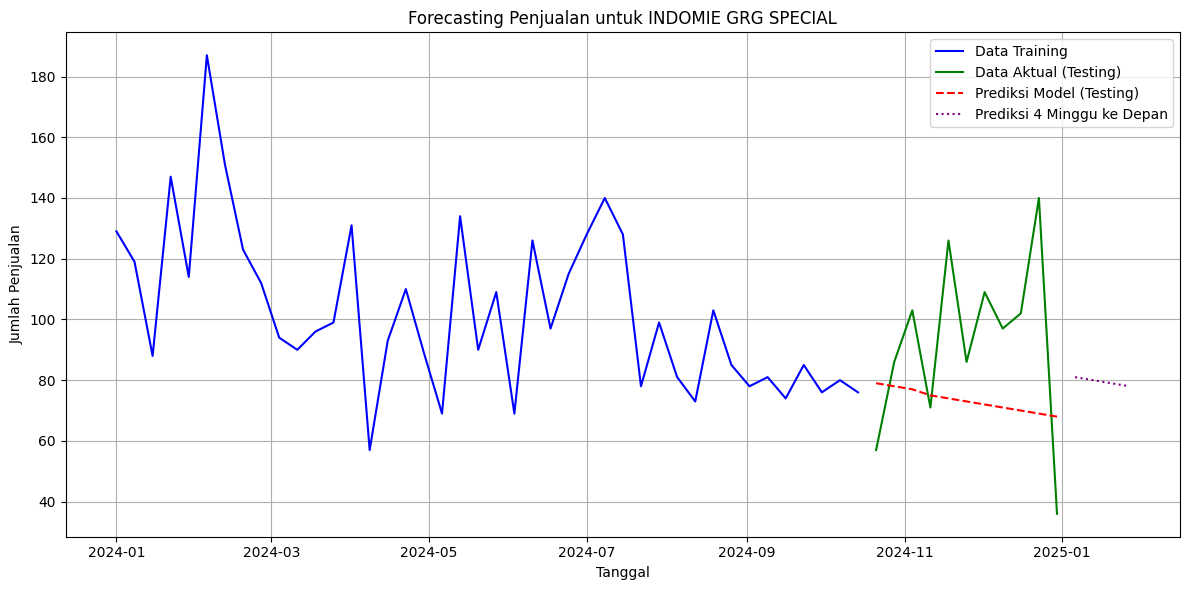



Memproses Item: INDOMILK KID CKL 115ML
  Total observasi: 53
  Ukuran data training: 42 observasi (80% dari total)
  Ukuran data testing: 11 observasi (Sisa)
  Data training terakhir: 2024-10-14
  Data testing awal: 2024-10-21
  Model ExponentialSmoothing (Trend='add') berhasil di-fit.

  Prediksi vs Aktual untuk INDOMILK KID CKL 115ML (periode evaluasi):
            Actual  Predicted
2024-10-21    49.0       40.0
2024-10-28    48.0       41.0
2024-11-04    51.0       42.0
2024-11-11    33.0       42.0
2024-11-18    44.0       43.0
2024-11-25    33.0       44.0
2024-12-02    47.0       44.0
2024-12-09    46.0       45.0
2024-12-16    66.0       46.0
2024-12-23    60.0       47.0
2024-12-30    21.0       47.0

  Evaluasi Model INDOMILK KID CKL 115ML:
  MAE (Mean Absolute Error): 9.91
  RMSE (Root Mean Squared Error): 12.32
  MAPE (Mean Absolute Percentage Error): 27.07%

  Prediksi Penjualan INDOMILK KID CKL 115ML untuk 4 minggu ke depan:
2025-01-06    49.0
2025-01-13    50.0
2025-01-

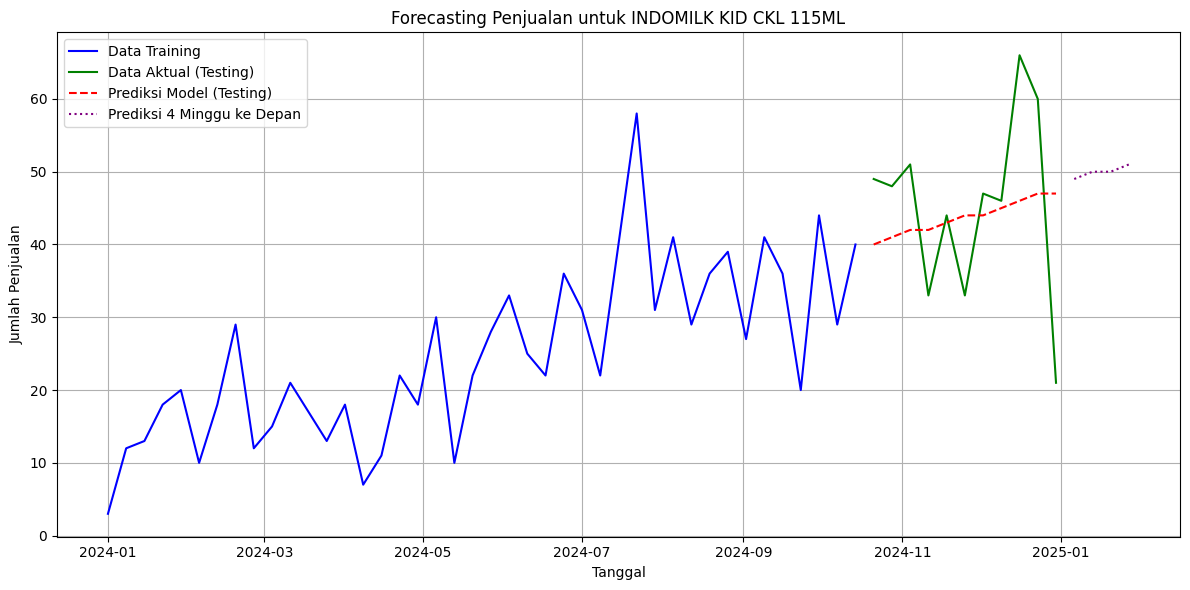



Memproses Item: SEDAAP MIE SOTO
  Total observasi: 53
  Ukuran data training: 42 observasi (80% dari total)
  Ukuran data testing: 11 observasi (Sisa)
  Data training terakhir: 2024-10-14
  Data testing awal: 2024-10-21
  Model ExponentialSmoothing (Trend='add') berhasil di-fit.

  Prediksi vs Aktual untuk SEDAAP MIE SOTO (periode evaluasi):
            Actual  Predicted
2024-10-21    16.0       21.0
2024-10-28    21.0       21.0
2024-11-04    11.0       21.0
2024-11-11    12.0       21.0
2024-11-18    19.0       21.0
2024-11-25    28.0       21.0
2024-12-02    26.0       21.0
2024-12-09    16.0       21.0
2024-12-16    28.0       21.0
2024-12-23    33.0       21.0
2024-12-30     8.0       21.0

  Evaluasi Model SEDAAP MIE SOTO:
  MAE (Mean Absolute Error): 6.82
  RMSE (Root Mean Squared Error): 7.81
  MAPE (Mean Absolute Percentage Error): 46.09%

  Prediksi Penjualan SEDAAP MIE SOTO untuk 4 minggu ke depan:
2025-01-06    20.0
2025-01-13    20.0
2025-01-20    20.0
2025-01-27    20.0

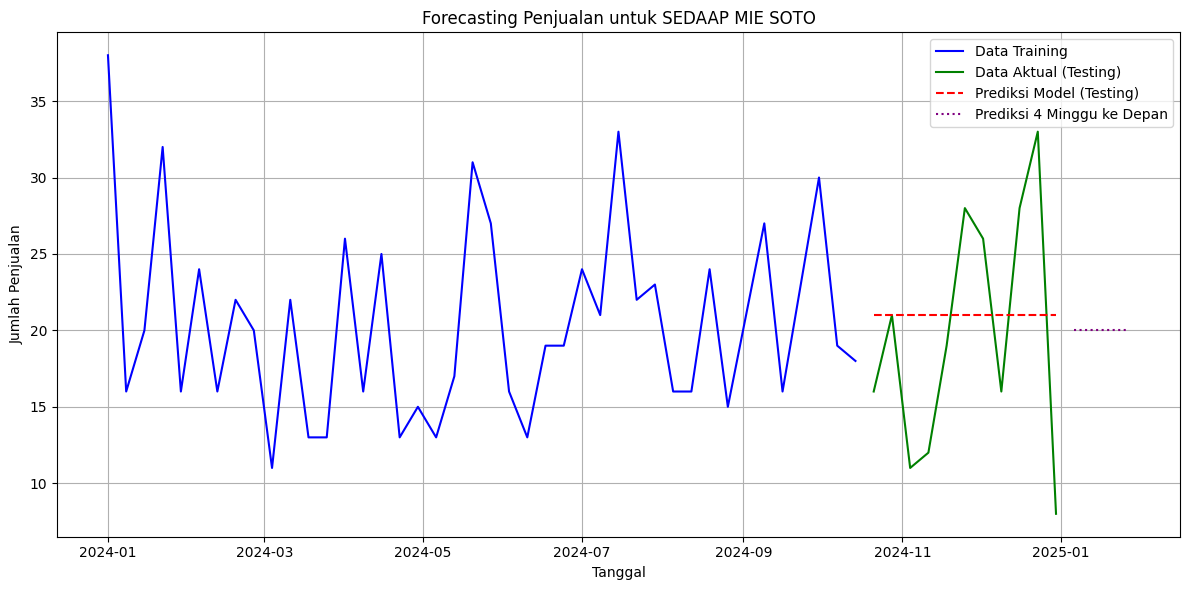



Memproses Item: SAKINAH 1500ML
  Total observasi: 53
  Ukuran data training: 42 observasi (80% dari total)
  Ukuran data testing: 11 observasi (Sisa)
  Data training terakhir: 2024-10-14
  Data testing awal: 2024-10-21
  Model ExponentialSmoothing (Trend='add') berhasil di-fit.

  Prediksi vs Aktual untuk SAKINAH 1500ML (periode evaluasi):
            Actual  Predicted
2024-10-21    56.0       32.0
2024-10-28    47.0       33.0
2024-11-04    39.0       33.0
2024-11-11    49.0       34.0
2024-11-18    44.0       35.0
2024-11-25    37.0       36.0
2024-12-02    23.0       36.0
2024-12-09    31.0       37.0
2024-12-16    31.0       38.0
2024-12-23    15.0       38.0
2024-12-30    11.0       39.0

  Evaluasi Model SAKINAH 1500ML:
  MAE (Mean Absolute Error): 13.27
  RMSE (Root Mean Squared Error): 15.61
  MAPE (Mean Absolute Percentage Error): 58.92%

  Prediksi Penjualan SAKINAH 1500ML untuk 4 minggu ke depan:
2025-01-06    19.0
2025-01-13    19.0
2025-01-20    19.0
2025-01-27    19.0
F

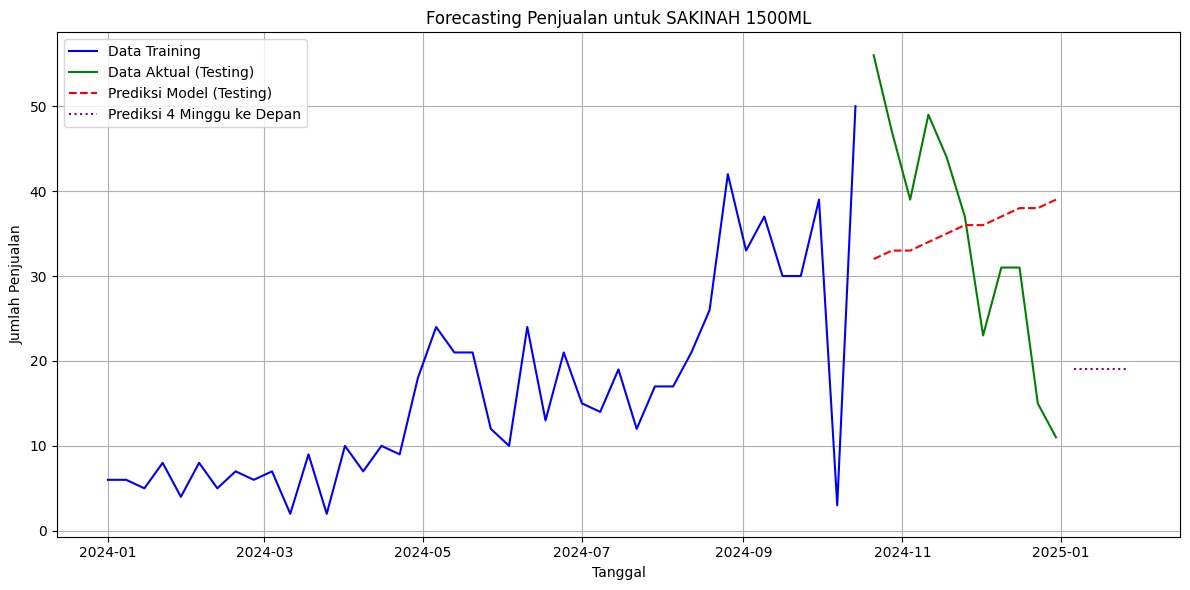



Memproses Item: INDOMILK KID VNL 115ML
  Total observasi: 53
  Ukuran data training: 42 observasi (80% dari total)
  Ukuran data testing: 11 observasi (Sisa)
  Data training terakhir: 2024-10-14
  Data testing awal: 2024-10-21
  Model ExponentialSmoothing (Trend='add') berhasil di-fit.

  Prediksi vs Aktual untuk INDOMILK KID VNL 115ML (periode evaluasi):
            Actual  Predicted
2024-10-21    17.0       20.0
2024-10-28     8.0       20.0
2024-11-04    15.0       20.0
2024-11-11    15.0       20.0
2024-11-18    15.0       20.0
2024-11-25    18.0       21.0
2024-12-02    11.0       21.0
2024-12-09     6.0       21.0
2024-12-16     3.0       21.0
2024-12-23    10.0       22.0
2024-12-30     6.0       22.0

  Evaluasi Model INDOMILK KID VNL 115ML:
  MAE (Mean Absolute Error): 9.45
  RMSE (Root Mean Squared Error): 10.81
  MAPE (Mean Absolute Percentage Error): 146.54%

  Prediksi Penjualan INDOMILK KID VNL 115ML untuk 4 minggu ke depan:
2025-01-06    7.0
2025-01-13    7.0
2025-01-2

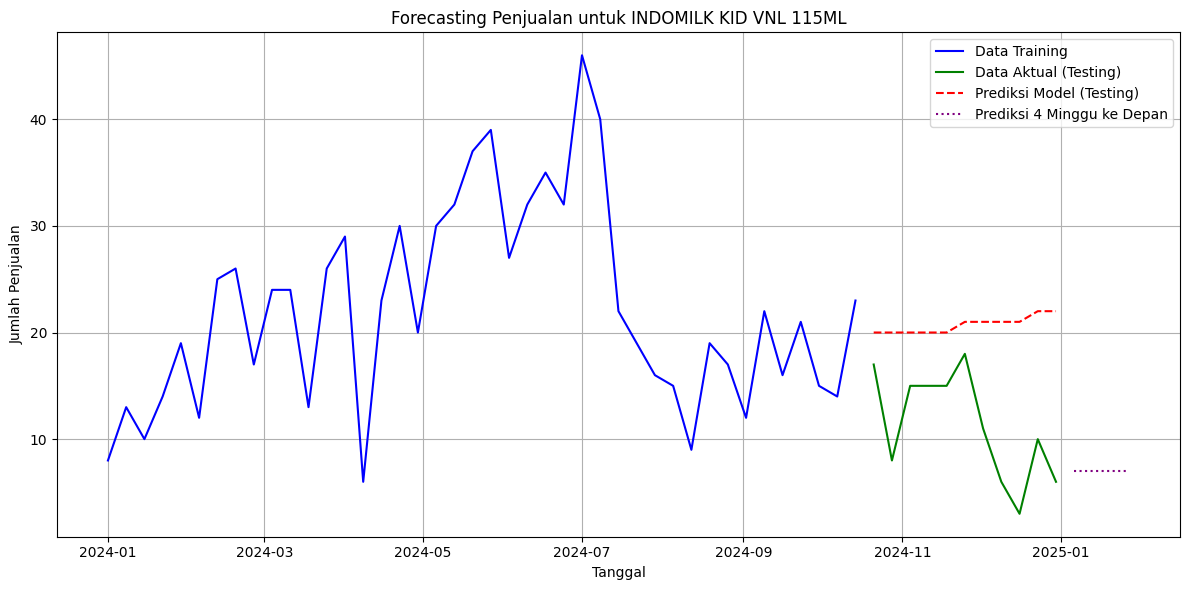



Memproses Item: INDOMILK KID STR 115ML
  Total observasi: 53
  Ukuran data training: 42 observasi (80% dari total)
  Ukuran data testing: 11 observasi (Sisa)
  Data training terakhir: 2024-10-14
  Data testing awal: 2024-10-21
  Model ExponentialSmoothing (Trend='add') berhasil di-fit.

  Prediksi vs Aktual untuk INDOMILK KID STR 115ML (periode evaluasi):
            Actual  Predicted
2024-10-21    16.0       19.0
2024-10-28    23.0       19.0
2024-11-04    14.0       19.0
2024-11-11    10.0       20.0
2024-11-18    11.0       20.0
2024-11-25    10.0       20.0
2024-12-02    11.0       20.0
2024-12-09    16.0       20.0
2024-12-16    15.0       20.0
2024-12-23    12.0       21.0
2024-12-30     3.0       21.0

  Evaluasi Model INDOMILK KID STR 115ML:
  MAE (Mean Absolute Error): 7.82
  RMSE (Root Mean Squared Error): 8.83
  MAPE (Mean Absolute Percentage Error): 106.26%

  Prediksi Penjualan INDOMILK KID STR 115ML untuk 4 minggu ke depan:
2025-01-06    10.0
2025-01-13    10.0
2025-01-

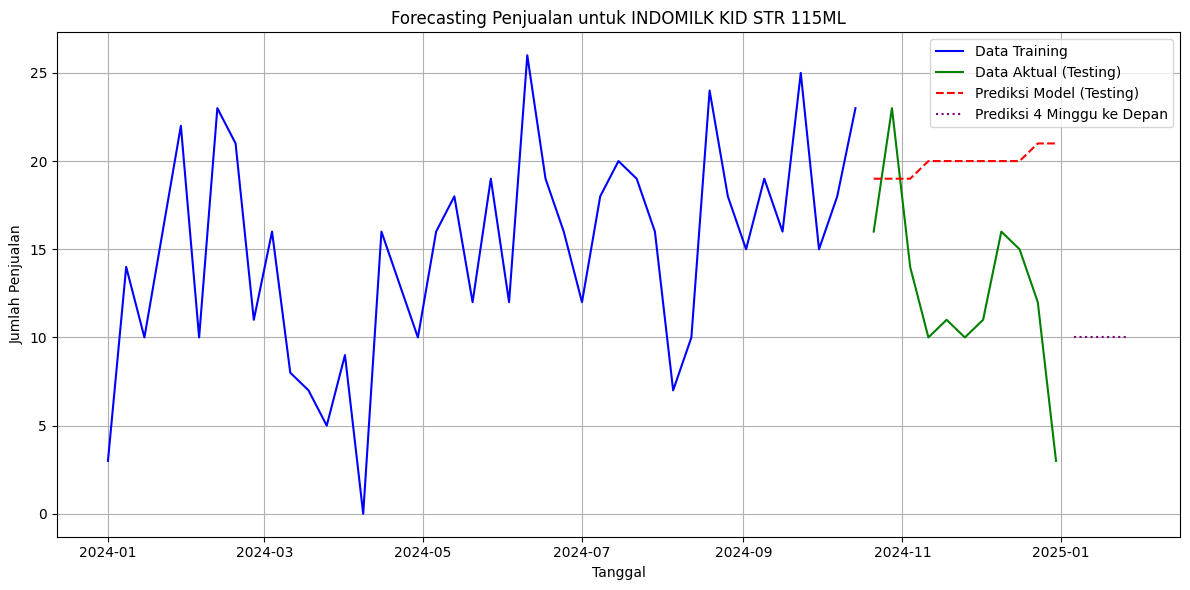



Memproses Item: INDOMIE SOTO MIE
  Total observasi: 53
  Ukuran data training: 42 observasi (80% dari total)
  Ukuran data testing: 11 observasi (Sisa)
  Data training terakhir: 2024-10-14
  Data testing awal: 2024-10-21
  Model ExponentialSmoothing (Trend='add') berhasil di-fit.

  Prediksi vs Aktual untuk INDOMIE SOTO MIE (periode evaluasi):
            Actual  Predicted
2024-10-21    25.0       12.0
2024-10-28    13.0       12.0
2024-11-04     9.0       13.0
2024-11-11    21.0       13.0
2024-11-18    33.0       13.0
2024-11-25     9.0       14.0
2024-12-02    23.0       14.0
2024-12-09    12.0       14.0
2024-12-16    26.0       15.0
2024-12-23    22.0       15.0
2024-12-30    10.0       15.0

  Evaluasi Model INDOMIE SOTO MIE:
  MAE (Mean Absolute Error): 7.73
  RMSE (Root Mean Squared Error): 9.32
  MAPE (Mean Absolute Percentage Error): 39.85%

  Prediksi Penjualan INDOMIE SOTO MIE untuk 4 minggu ke depan:
2025-01-06    21.0
2025-01-13    21.0
2025-01-20    22.0
2025-01-27    

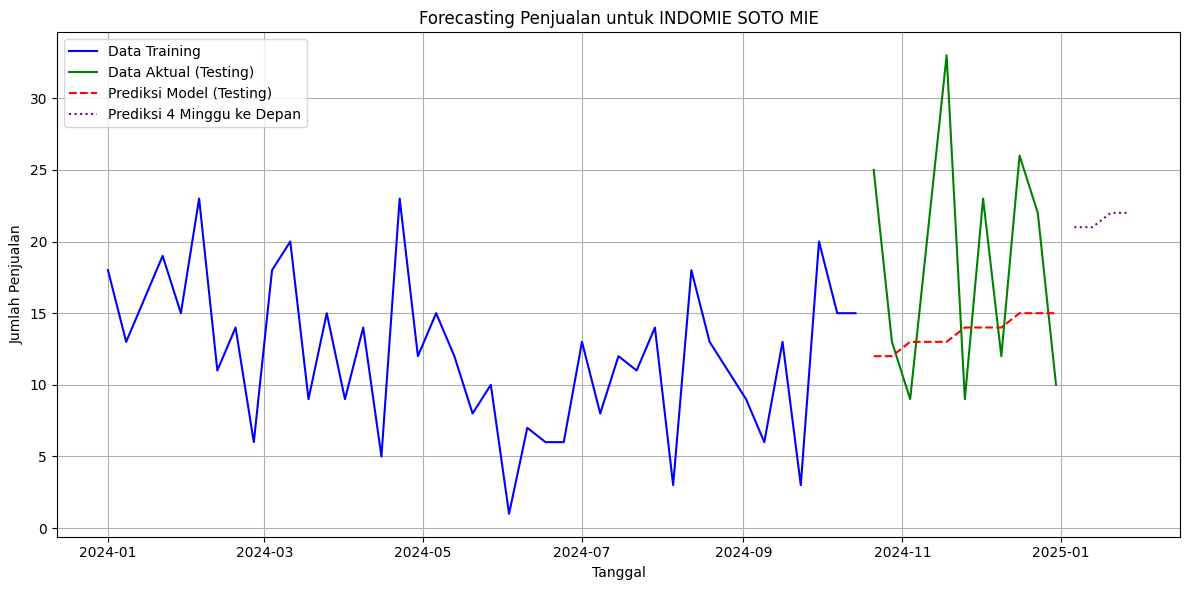



Memproses Item: SEDAAP MIE AYAM BWG
  Total observasi: 53
  Ukuran data training: 42 observasi (80% dari total)
  Ukuran data testing: 11 observasi (Sisa)
  Data training terakhir: 2024-10-14
  Data testing awal: 2024-10-21
  Model ExponentialSmoothing (Trend='add') berhasil di-fit.

  Prediksi vs Aktual untuk SEDAAP MIE AYAM BWG (periode evaluasi):
            Actual  Predicted
2024-10-21     8.0        7.0
2024-10-28     6.0        7.0
2024-11-04     8.0        7.0
2024-11-11     6.0        7.0
2024-11-18     7.0        7.0
2024-11-25     4.0        7.0
2024-12-02     5.0        7.0
2024-12-09    10.0        7.0
2024-12-16     9.0        7.0
2024-12-23     2.0        7.0
2024-12-30     2.0        7.0

  Evaluasi Model SEDAAP MIE AYAM BWG:
  MAE (Mean Absolute Error): 2.18
  RMSE (Root Mean Squared Error): 2.70
  MAPE (Mean Absolute Percentage Error): 65.96%

  Prediksi Penjualan SEDAAP MIE AYAM BWG untuk 4 minggu ke depan:
2025-01-06    6.0
2025-01-13    6.0
2025-01-20    6.0
2025-

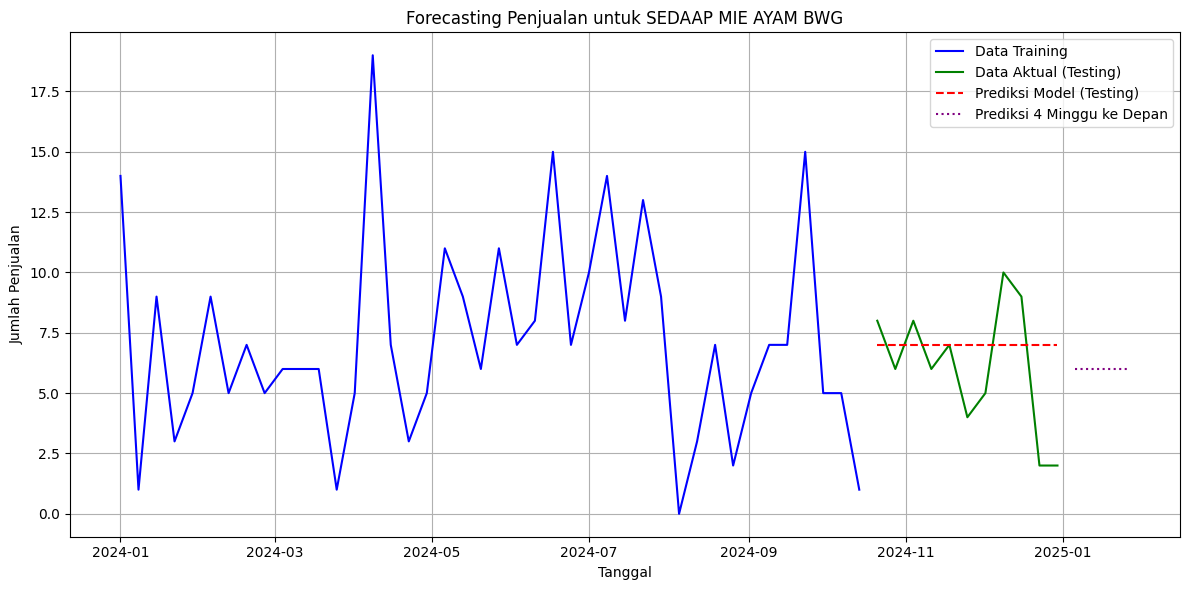



Memproses Item: EKONOMI LIQUID REFF 235ML
  Total observasi: 53
  Ukuran data training: 42 observasi (80% dari total)
  Ukuran data testing: 11 observasi (Sisa)
  Data training terakhir: 2024-10-14
  Data testing awal: 2024-10-21
  Model ExponentialSmoothing (Trend='add') berhasil di-fit.

  Prediksi vs Aktual untuk EKONOMI LIQUID REFF 235ML (periode evaluasi):
            Actual  Predicted
2024-10-21     6.0        8.0
2024-10-28    12.0        8.0
2024-11-04     7.0        8.0
2024-11-11    12.0        8.0
2024-11-18    14.0        8.0
2024-11-25     3.0        8.0
2024-12-02     8.0        8.0
2024-12-09     1.0        8.0
2024-12-16     3.0        8.0
2024-12-23     7.0        8.0
2024-12-30     4.0        8.0

  Evaluasi Model EKONOMI LIQUID REFF 235ML:
  MAE (Mean Absolute Error): 3.55
  RMSE (Root Mean Squared Error): 4.15
  MAPE (Mean Absolute Percentage Error): 118.61%

  Prediksi Penjualan EKONOMI LIQUID REFF 235ML untuk 4 minggu ke depan:
2025-01-06    8.0
2025-01-13    8.

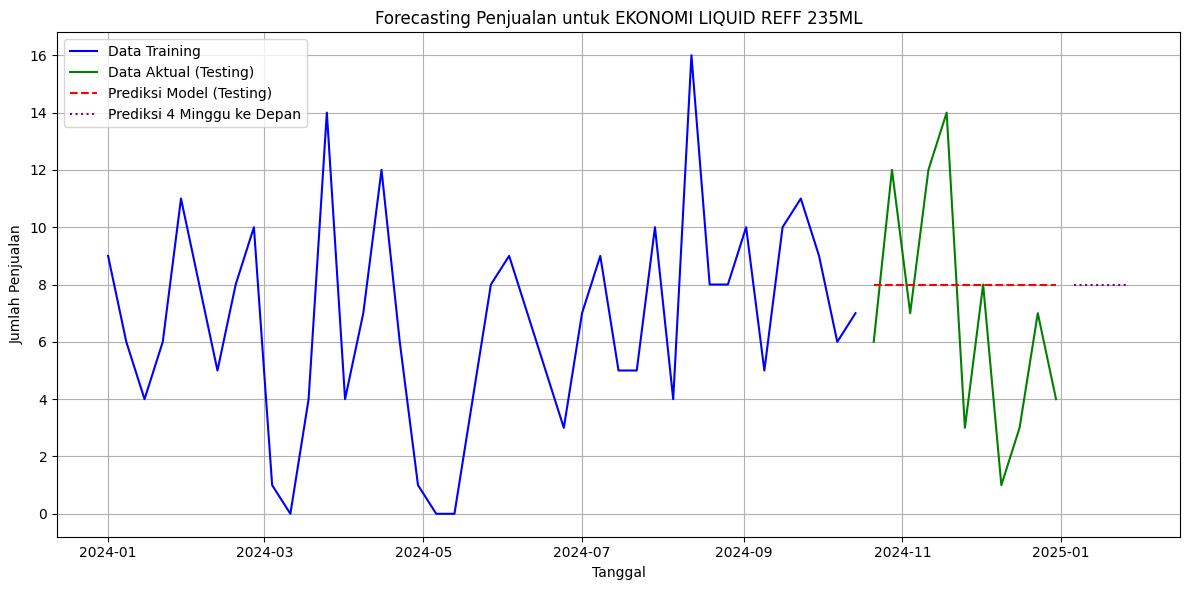



Memproses Item: WALLS CORN B/WHITE 82GR
  Total observasi: 53
  Ukuran data training: 42 observasi (80% dari total)
  Ukuran data testing: 11 observasi (Sisa)
  Data training terakhir: 2024-10-14
  Data testing awal: 2024-10-21
  Model ExponentialSmoothing (Trend='add') berhasil di-fit.

  Prediksi vs Aktual untuk WALLS CORN B/WHITE 82GR (periode evaluasi):
            Actual  Predicted
2024-10-21     5.0        3.0
2024-10-28     5.0        3.0
2024-11-04     6.0        3.0
2024-11-11     1.0        3.0
2024-11-18     6.0        3.0
2024-11-25     5.0        2.0
2024-12-02     8.0        2.0
2024-12-09     9.0        2.0
2024-12-16     7.0        2.0
2024-12-23    18.0        2.0
2024-12-30     0.0        2.0

  Evaluasi Model WALLS CORN B/WHITE 82GR:
  MAE (Mean Absolute Error): 4.64
  RMSE (Root Mean Squared Error): 6.10
  MAPE (Mean Absolute Percentage Error): 75.31%

  Prediksi Penjualan WALLS CORN B/WHITE 82GR untuk 4 minggu ke depan:
2025-01-06    7.0
2025-01-13    7.0
2025-01

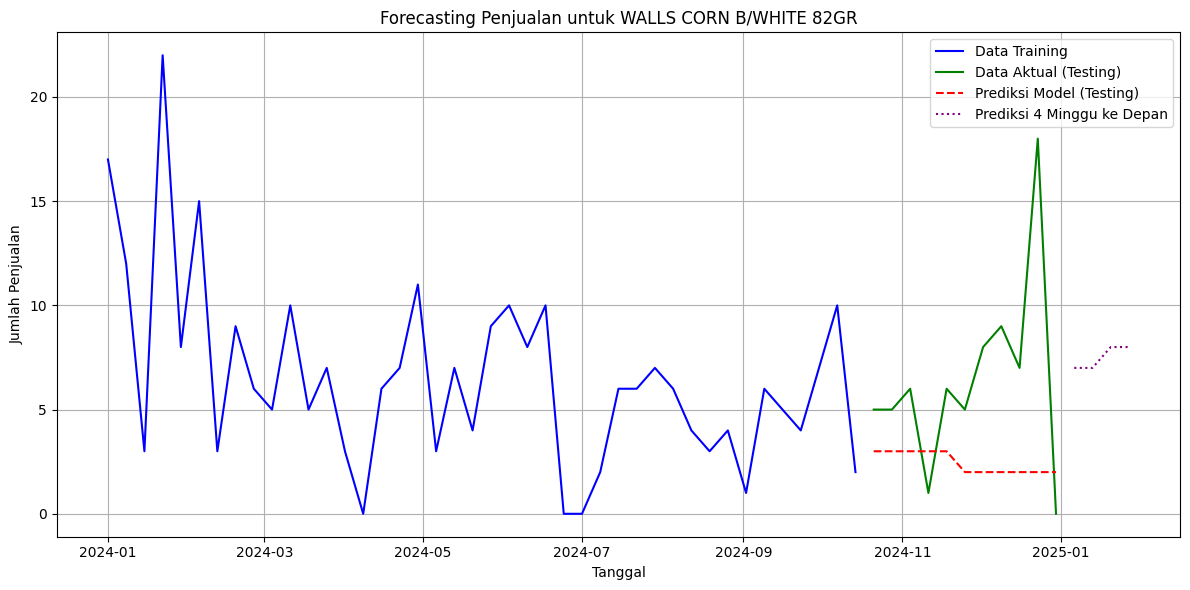



Memproses Item: WALLS POPULAIRE CKL
  Total observasi: 53
  Ukuran data training: 42 observasi (80% dari total)
  Ukuran data testing: 11 observasi (Sisa)
  Data training terakhir: 2024-10-14
  Data testing awal: 2024-10-21
  Model ExponentialSmoothing (Trend='add') berhasil di-fit.

  Prediksi vs Aktual untuk WALLS POPULAIRE CKL (periode evaluasi):
            Actual  Predicted
2024-10-21     6.0        6.0
2024-10-28     8.0        6.0
2024-11-04     7.0        6.0
2024-11-11     4.0        6.0
2024-11-18     7.0        6.0
2024-11-25     4.0        6.0
2024-12-02     4.0        6.0
2024-12-09     5.0        6.0
2024-12-16     5.0        6.0
2024-12-23    10.0        6.0
2024-12-30     9.0        6.0

  Evaluasi Model WALLS POPULAIRE CKL:
  MAE (Mean Absolute Error): 1.73
  RMSE (Root Mean Squared Error): 2.02
  MAPE (Mean Absolute Percentage Error): 28.81%

  Prediksi Penjualan WALLS POPULAIRE CKL untuk 4 minggu ke depan:
2025-01-06    6.0
2025-01-13    6.0
2025-01-20    6.0
2025-

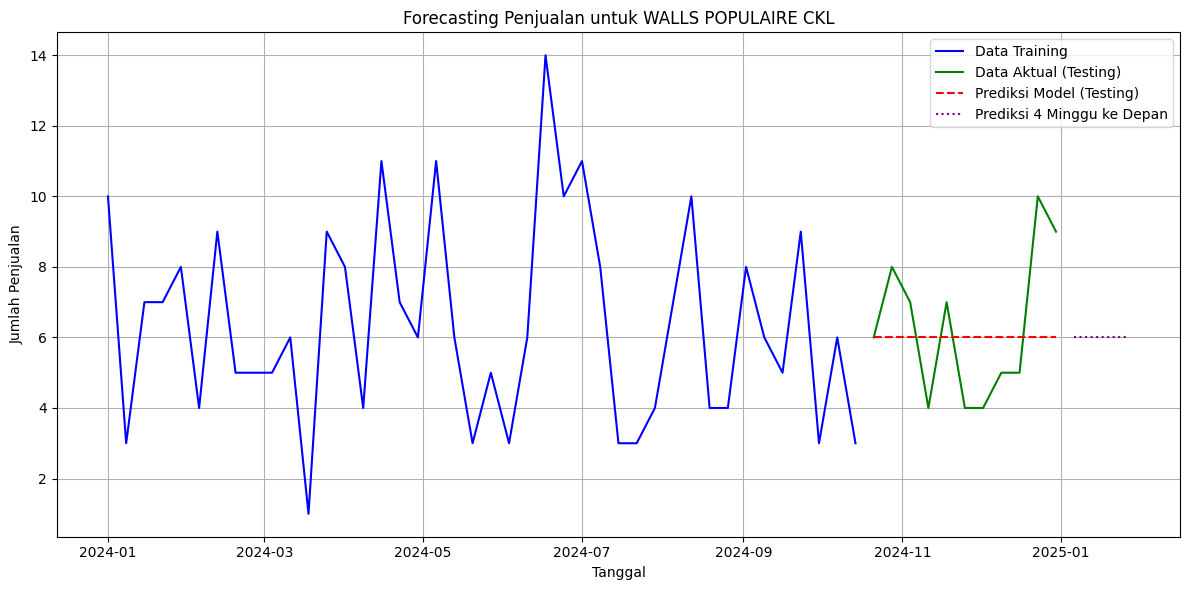



Memproses Item: WALLS POPULAIRE STR
  Total observasi: 53
  Ukuran data training: 42 observasi (80% dari total)
  Ukuran data testing: 11 observasi (Sisa)
  Data training terakhir: 2024-10-14
  Data testing awal: 2024-10-21
  Model ExponentialSmoothing (Trend='add') berhasil di-fit.

  Prediksi vs Aktual untuk WALLS POPULAIRE STR (periode evaluasi):
            Actual  Predicted
2024-10-21     5.0        7.0
2024-10-28    12.0        7.0
2024-11-04     5.0        7.0
2024-11-11     4.0        7.0
2024-11-18    10.0        7.0
2024-11-25     3.0        7.0
2024-12-02     6.0        7.0
2024-12-09     5.0        7.0
2024-12-16     3.0        7.0
2024-12-23     5.0        7.0
2024-12-30     1.0        7.0

  Evaluasi Model WALLS POPULAIRE STR:
  MAE (Mean Absolute Error): 3.09
  RMSE (Root Mean Squared Error): 3.41
  MAPE (Mean Absolute Percentage Error): 108.18%

  Prediksi Penjualan WALLS POPULAIRE STR untuk 4 minggu ke depan:
2025-01-06    5.0
2025-01-13    5.0
2025-01-20    5.0
2025

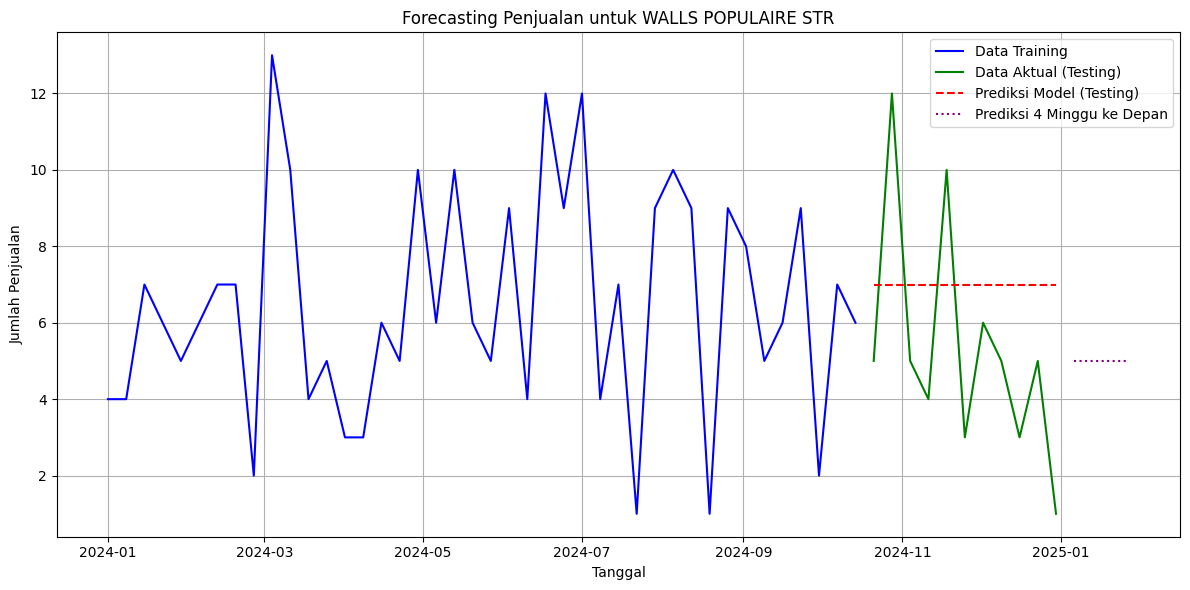



Memproses Item: MAMA LEMON 115ML
  Total observasi: 53
  Ukuran data training: 42 observasi (80% dari total)
  Ukuran data testing: 11 observasi (Sisa)
  Data training terakhir: 2024-10-14
  Data testing awal: 2024-10-21
  Model ExponentialSmoothing (Trend='add') berhasil di-fit.

  Prediksi vs Aktual untuk MAMA LEMON 115ML (periode evaluasi):
            Actual  Predicted
2024-10-21     1.0        5.0
2024-10-28     4.0        5.0
2024-11-04     4.0        5.0
2024-11-11    10.0        5.0
2024-11-18     4.0        5.0
2024-11-25     3.0        5.0
2024-12-02     5.0        5.0
2024-12-09     4.0        4.0
2024-12-16     4.0        4.0
2024-12-23     4.0        4.0
2024-12-30     0.0        4.0

  Evaluasi Model MAMA LEMON 115ML:
  MAE (Mean Absolute Error): 1.64
  RMSE (Root Mean Squared Error): 2.41
  MAPE (Mean Absolute Percentage Error): 59.17%

  Prediksi Penjualan MAMA LEMON 115ML untuk 4 minggu ke depan:
2025-01-06    4.0
2025-01-13    4.0
2025-01-20    3.0
2025-01-27    3.0

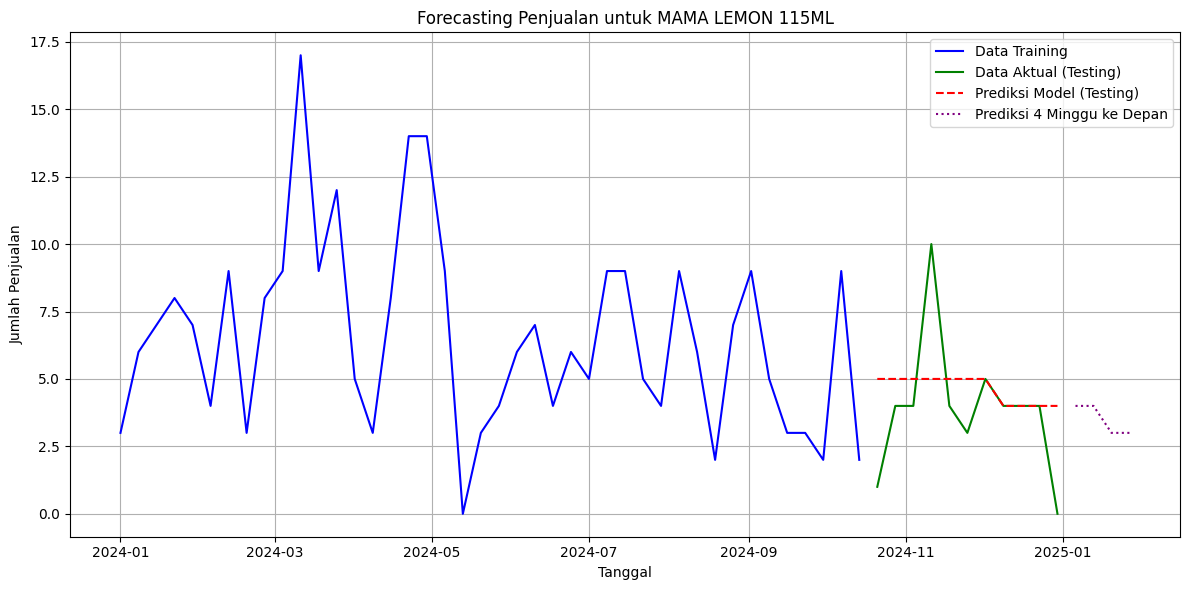



Memproses Item: DELFI TOP CHO 9GR
  Total observasi: 53
  Ukuran data training: 42 observasi (80% dari total)
  Ukuran data testing: 11 observasi (Sisa)
  Data training terakhir: 2024-10-14
  Data testing awal: 2024-10-21
  Model ExponentialSmoothing (Trend='add') berhasil di-fit.

  Prediksi vs Aktual untuk DELFI TOP CHO 9GR (periode evaluasi):
            Actual  Predicted
2024-10-21     6.0        6.0
2024-10-28     5.0        6.0
2024-11-04     5.0        6.0
2024-11-11     4.0        6.0
2024-11-18     8.0        6.0
2024-11-25     5.0        6.0
2024-12-02     4.0        6.0
2024-12-09    10.0        7.0
2024-12-16     8.0        7.0
2024-12-23     4.0        7.0
2024-12-30     2.0        7.0

  Evaluasi Model DELFI TOP CHO 9GR:
  MAE (Mean Absolute Error): 1.91
  RMSE (Root Mean Squared Error): 2.32
  MAPE (Mean Absolute Percentage Error): 50.23%

  Prediksi Penjualan DELFI TOP CHO 9GR untuk 4 minggu ke depan:
2025-01-06    6.0
2025-01-13    6.0
2025-01-20    6.0
2025-01-27   

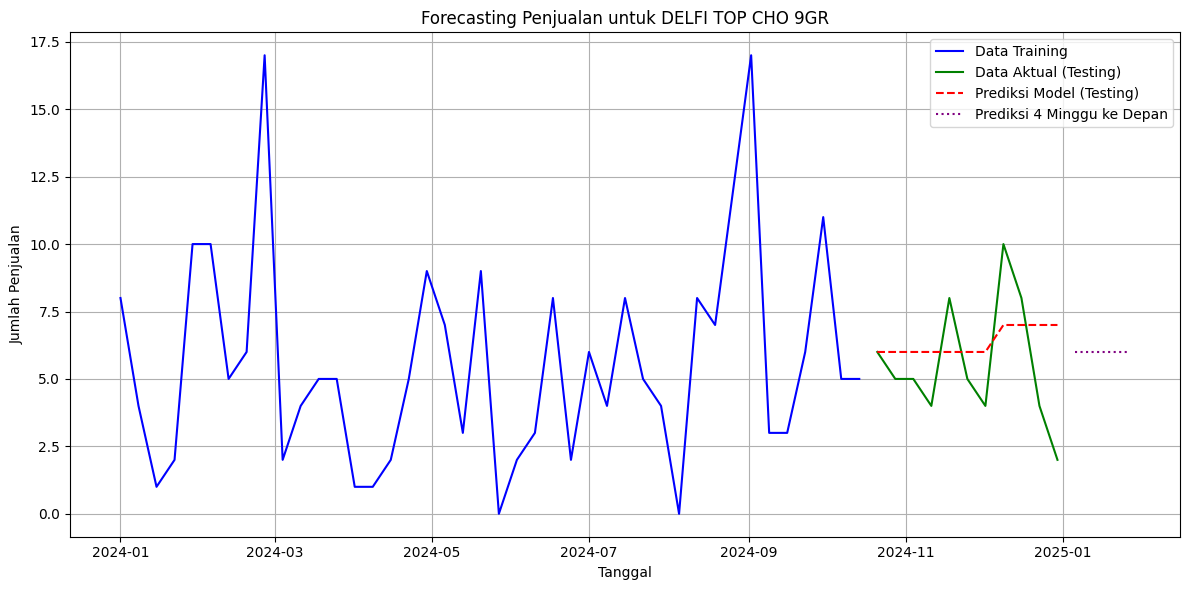



Memproses Item: ROMA KELAPA 300GR
  Total observasi: 53
  Ukuran data training: 42 observasi (80% dari total)
  Ukuran data testing: 11 observasi (Sisa)
  Data training terakhir: 2024-10-14
  Data testing awal: 2024-10-21
  Model ExponentialSmoothing (Trend='add') berhasil di-fit.

  Prediksi vs Aktual untuk ROMA KELAPA 300GR (periode evaluasi):
            Actual  Predicted
2024-10-21    13.0        5.0
2024-10-28     6.0        5.0
2024-11-04     6.0        6.0
2024-11-11     6.0        6.0
2024-11-18     3.0        6.0
2024-11-25     8.0        6.0
2024-12-02     7.0        6.0
2024-12-09     9.0        7.0
2024-12-16     4.0        7.0
2024-12-23     8.0        7.0
2024-12-30     1.0        7.0

  Evaluasi Model ROMA KELAPA 300GR:
  MAE (Mean Absolute Error): 2.45
  RMSE (Root Mean Squared Error): 3.42
  MAPE (Mean Absolute Percentage Error): 84.29%

  Prediksi Penjualan ROMA KELAPA 300GR untuk 4 minggu ke depan:
2025-01-06    5.0
2025-01-13    5.0
2025-01-20    5.0
2025-01-27   

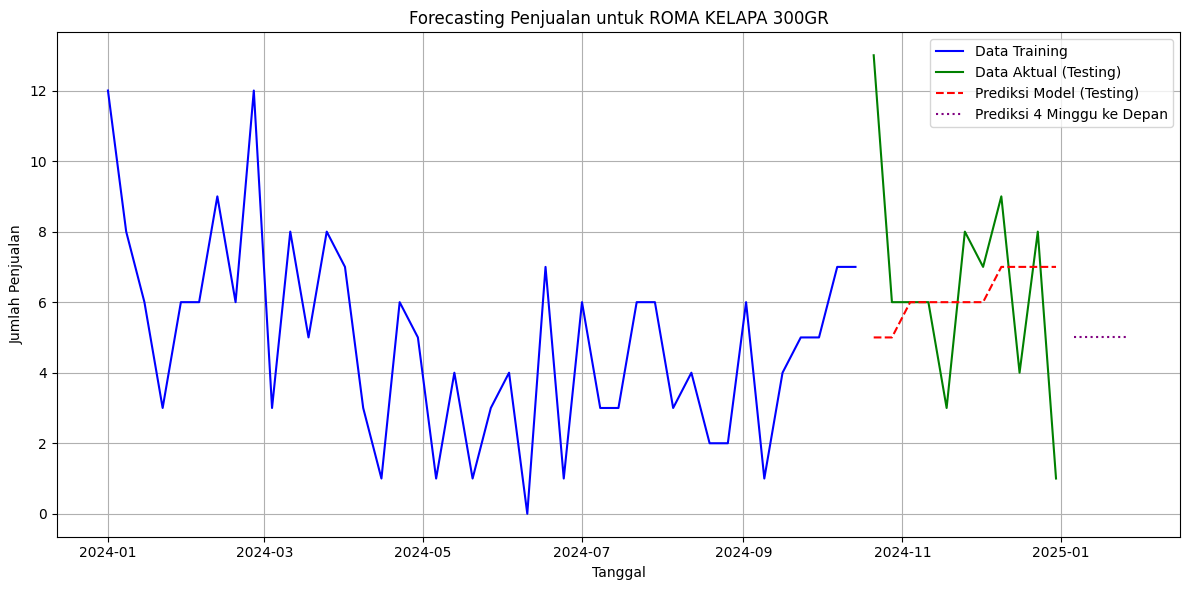



Memproses Item: DELFI TOP B/WHITE 9GR
  Total observasi: 53
  Ukuran data training: 42 observasi (80% dari total)
  Ukuran data testing: 11 observasi (Sisa)
  Data training terakhir: 2024-10-14
  Data testing awal: 2024-10-21
  Model ExponentialSmoothing (Trend='add') berhasil di-fit.

  Prediksi vs Aktual untuk DELFI TOP B/WHITE 9GR (periode evaluasi):
            Actual  Predicted
2024-10-21     3.0        6.0
2024-10-28     7.0        6.0
2024-11-04     2.0        6.0
2024-11-11     9.0        6.0
2024-11-18     4.0        6.0
2024-11-25    11.0        6.0
2024-12-02     5.0        6.0
2024-12-09     3.0        7.0
2024-12-16     2.0        7.0
2024-12-23     8.0        7.0
2024-12-30     1.0        7.0

  Evaluasi Model DELFI TOP B/WHITE 9GR:
  MAE (Mean Absolute Error): 3.18
  RMSE (Root Mean Squared Error): 3.61
  MAPE (Mean Absolute Percentage Error): 132.63%

  Prediksi Penjualan DELFI TOP B/WHITE 9GR untuk 4 minggu ke depan:
2025-01-06    6.0
2025-01-13    6.0
2025-01-20    

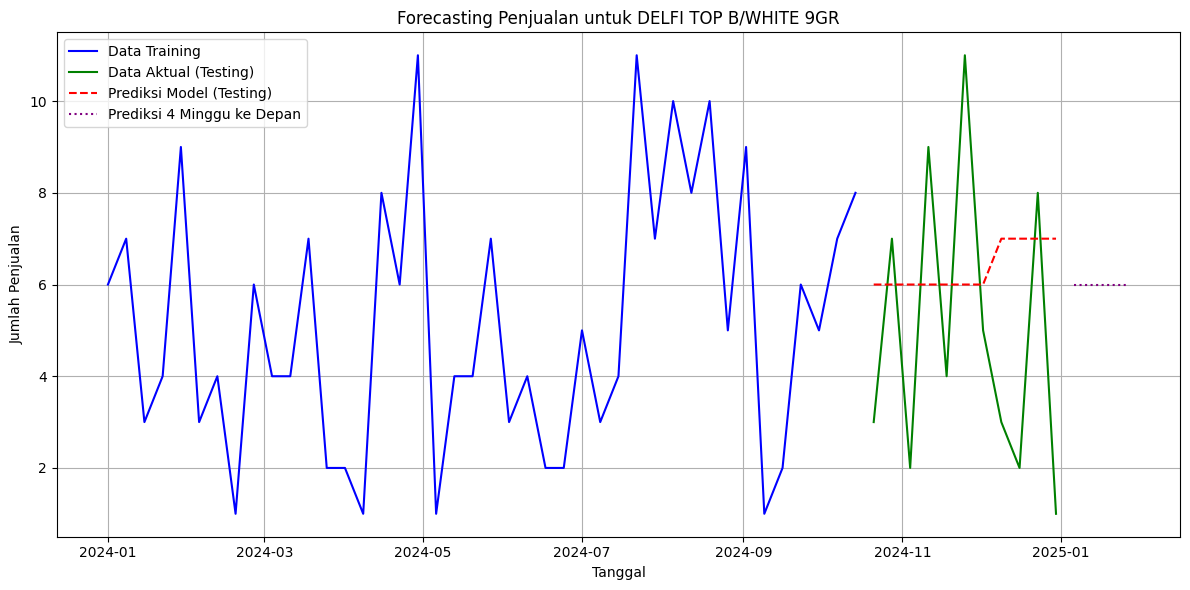



Memproses Item: BISKUAT BOLU CKL 16GR
  Total observasi: 53
  Ukuran data training: 42 observasi (80% dari total)
  Ukuran data testing: 11 observasi (Sisa)
  Data training terakhir: 2024-10-14
  Data testing awal: 2024-10-21
  Model ExponentialSmoothing (Trend='add') berhasil di-fit.

  Prediksi vs Aktual untuk BISKUAT BOLU CKL 16GR (periode evaluasi):
            Actual  Predicted
2024-10-21     5.0        4.0
2024-10-28     5.0        4.0
2024-11-04     8.0        4.0
2024-11-11     7.0        4.0
2024-11-18    13.0        4.0
2024-11-25     4.0        4.0
2024-12-02     3.0        4.0
2024-12-09     6.0        4.0
2024-12-16     5.0        4.0
2024-12-23     5.0        4.0
2024-12-30     0.0        4.0

  Evaluasi Model BISKUAT BOLU CKL 16GR:
  MAE (Mean Absolute Error): 2.45
  RMSE (Root Mean Squared Error): 3.45
  MAPE (Mean Absolute Percentage Error): 30.88%

  Prediksi Penjualan BISKUAT BOLU CKL 16GR untuk 4 minggu ke depan:
2025-01-06    5.0
2025-01-13    5.0
2025-01-20    5

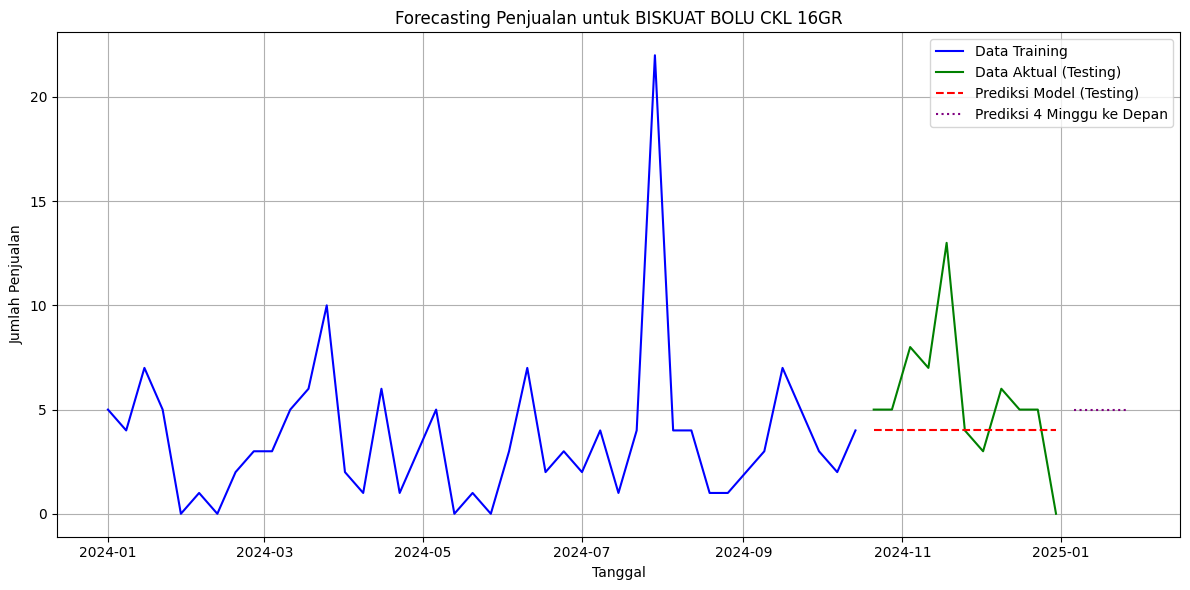



Memproses Item: DELFI TOP STR 9GR
  Total observasi: 53
  Ukuran data training: 42 observasi (80% dari total)
  Ukuran data testing: 11 observasi (Sisa)
  Data training terakhir: 2024-10-14
  Data testing awal: 2024-10-21
  Model ExponentialSmoothing (Trend='add') berhasil di-fit.

  Prediksi vs Aktual untuk DELFI TOP STR 9GR (periode evaluasi):
            Actual  Predicted
2024-10-21     1.0        4.0
2024-10-28     2.0        4.0
2024-11-04     5.0        4.0
2024-11-11     2.0        4.0
2024-11-18     2.0        4.0
2024-11-25     8.0        4.0
2024-12-02     1.0        4.0
2024-12-09     5.0        4.0
2024-12-16     2.0        4.0
2024-12-23     4.0        4.0
2024-12-30     1.0        4.0

  Evaluasi Model DELFI TOP STR 9GR:
  MAE (Mean Absolute Error): 2.09
  RMSE (Root Mean Squared Error): 2.35
  MAPE (Mean Absolute Percentage Error): 126.36%

  Prediksi Penjualan DELFI TOP STR 9GR untuk 4 minggu ke depan:
2025-01-06    3.0
2025-01-13    3.0
2025-01-20    3.0
2025-01-27  

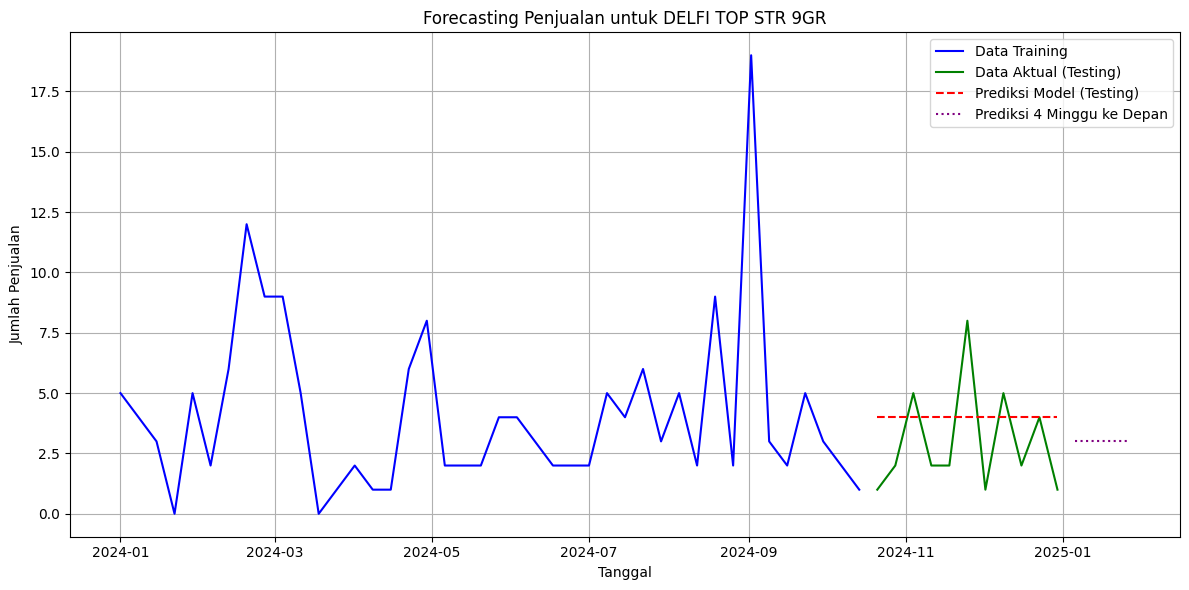

In [18]:
# --- 3. Looping untuk Setiap Item dan Melakukan Forecasting ---
print("\n--- Memulai Proses Forecasting dan Evaluasi ---\n")

# Menentukan jumlah minimum observasi yang diperlukan
# Untuk model time series sederhana (misal SES), setidaknya 2 data (1 train, 1 test).
# Untuk ExponentialSmoothing dengan trend, idealnya lebih dari itu (misal 3 atau 4).
MIN_OBSERVATIONS_REQUIRED = 3 # Minimal 2 data training, 1 data testing

for item in item_columns:
    print(f"===========================================================")
    print(f"Memproses Item: {item}")
    print(f"===========================================================")

    ts_data = df_final[item].copy()

    # Hitung ukuran train dan test berdasarkan rasio
    total_obs = len(ts_data)
    train_size = int(total_obs * TRAIN_RATIO)
    test_size_dynamic = total_obs - train_size

    # Penanganan kasus data yang sangat sedikit
    # Pastikan minimal ada data untuk training dan testing
    if total_obs < MIN_OBSERVATIONS_REQUIRED:
        print(f"  [SKIPPED] Data terlalu sedikit ({total_obs} observasi) untuk {item}. Minimal {MIN_OBSERVATIONS_REQUIRED} data diperlukan untuk forecasting dan evaluasi.")
        evaluation_results[item] = {'MAE': np.nan, 'RMSE': np.nan, 'MAPE': np.nan, 'Info': 'Not enough data for model fit and split'}
        future_forecasts[item] = np.nan
        continue

    # Sesuaikan ukuran train/test jika hasil perhitungan rasio menghasilkan 0 atau nilai yang terlalu kecil
    if train_size < 1:
        train_size = 1 # Minimal 1 data untuk training
    if test_size_dynamic < 1:
        test_size_dynamic = 1 # Minimal 1 data untuk testing

    # Jika setelah penyesuaian, total data menjadi kurang dari yang dibutuhkan (misal karena penyesuaian train_size & test_size)
    if train_size + test_size_dynamic > total_obs:
        # Ini bisa terjadi jika total_obs sangat kecil dan kita forced train_size/test_size ke 1
        # Dalam kasus ini, kita bisa alokasikan sisanya ke train, atau ulang alokasi
        # Untuk kesederhanaan, jika total_obs sangat kecil dan train_size sudah 1, sisanya ke test_size_dynamic
        test_size_dynamic = total_obs - train_size
        if test_size_dynamic < 1: # Kalau masih 0, berarti data terlalu sedikit
            print(f"  [SKIPPED] Data terlalu sedikit ({total_obs} observasi) untuk {item} setelah penyesuaian rasio. Tidak bisa membuat train/test set yang valid.")
            evaluation_results[item] = {'MAE': np.nan, 'RMSE': np.nan, 'MAPE': np.nan, 'Info': 'Not enough data for valid split'}
            future_forecasts[item] = np.nan
            continue

    # Memisahkan data training dan testing secara kronologis (data terakhir untuk testing)
    train_data = ts_data[:-test_size_dynamic]
    test_data = ts_data[-test_size_dynamic:]

    # Pastikan data training tidak kosong (bisa terjadi jika total_obs sangat kecil dan test_size_dynamic mengambil semua)
    if len(train_data) == 0:
        print(f"  [SKIPPED] Data training kosong untuk {item} setelah split. Total data: {total_obs}, Train size: {train_size}, Test size: {test_size_dynamic}.")
        evaluation_results[item] = {'MAE': np.nan, 'RMSE': np.nan, 'MAPE': np.nan, 'Info': 'Training data is empty after split'}
        future_forecasts[item] = np.nan
        continue


    print(f"  Total observasi: {total_obs}")
    print(f"  Ukuran data training: {len(train_data)} observasi ({TRAIN_RATIO*100:.0f}% dari total)")
    print(f"  Ukuran data testing: {len(test_data)} observasi (Sisa)")
    print(f"  Data training terakhir: {train_data.index[-1].strftime('%Y-%m-%d')}")
    print(f"  Data testing awal: {test_data.index[0].strftime('%Y-%m-%d')}")

    # --- Pemilihan Model (Exponential Smoothing) ---
    try:
        model = ExponentialSmoothing(train_data,
                                     trend='add',
                                     seasonal=None,
                                     initialization_method="estimated"
                                    )
        model_fit = model.fit()
        print(f"  Model ExponentialSmoothing (Trend='add') berhasil di-fit.")
    except Exception as e:
        print(f"  Gagal fit model ExponentialSmoothing (Trend='add') untuk {item}: {e}. Mencoba SimpleExpSmoothing.")
        # Fallback ke SimpleExpSmoothing jika model yang lebih kompleks gagal
        try:
            model = SimpleExpSmoothing(train_data, initialization_method="estimated")
            model_fit = model.fit()
            print(f"  Menggunakan SimpleExpSmoothing untuk {item}.")
        except Exception as e_simple:
            print(f"  Gagal fit SimpleExpSmoothing untuk {item}: {e_simple}. Melewatkan item ini.")
            evaluation_results[item] = {'MAE': np.nan, 'RMSE': np.nan, 'MAPE': np.nan, 'Info': f'Model fit failed: {e_simple}'}
            future_forecasts[item] = np.nan
            continue


    # --- Evaluasi Model ---
    # Membuat prediksi untuk periode test
    predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

    # Pastikan prediksi tidak negatif dan bulatkan ke integer
    predictions = np.maximum(0, predictions).round()

    print(f"\n  Prediksi vs Aktual untuk {item} (periode evaluasi):")
    eval_df = pd.DataFrame({'Actual': test_data, 'Predicted': predictions})
    print(eval_df)

    # Menghitung Metrik Evaluasi
    mae = mean_absolute_error(test_data, predictions)
    rmse = np.sqrt(mean_squared_error(test_data, predictions))
    mape = mean_absolute_percentage_error(test_data, predictions)

    evaluation_results[item] = {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}

    print(f"\n  Evaluasi Model {item}:")
    print(f"  MAE (Mean Absolute Error): {mae:.2f}")
    print(f"  RMSE (Root Mean Squared Error): {rmse:.2f}")
    if not np.isnan(mape):
        print(f"  MAPE (Mean Absolute Percentage Error): {mape:.2f}%")
    else:
        print(f"  MAPE: Tidak dapat dihitung (tidak ada nilai aktual > 0 dalam periode testing).")

    # --- Forecasting Masa Depan ---
    # Memprediksi untuk N minggu ke depan dari data TERAKHIR (termasuk data test)
    # Kita akan fit ulang model dengan data LENGKAP untuk prediksi masa depan yang paling akurat
    try:
        final_model = ExponentialSmoothing(ts_data, # Menggunakan seluruh data ts_data
                                        trend='add',
                                        seasonal=None,
                                        initialization_method="estimated"
                                       )
        final_model_fit = final_model.fit()
    except Exception:
        # Fallback jika model dengan tren gagal pada data lengkap
        final_model = SimpleExpSmoothing(ts_data, initialization_method="estimated")
        final_model_fit = final_model.fit()

    future_predictions = final_model_fit.predict(start=df_final.index[-1] + pd.Timedelta(weeks=1),
                                                 end=df_final.index[-1] + pd.Timedelta(weeks=FORECAST_HORIZON))

    # Pastikan prediksi tidak negatif dan bulatkan ke integer
    future_predictions = np.maximum(0, future_predictions).round()

    print(f"\n  Prediksi Penjualan {item} untuk {FORECAST_HORIZON} minggu ke depan:")
    print(future_predictions.to_string())

    # Simpan hasil prediksi ke DataFrame future_forecasts
    future_forecasts[item] = future_predictions.values

    # --- Visualisasi (Opsional) ---
    plt.figure(figsize=(12, 6))
    plt.plot(train_data.index, train_data, label='Data Training', color='blue')
    plt.plot(test_data.index, test_data, label='Data Aktual (Testing)', color='green')
    plt.plot(predictions.index, predictions, label='Prediksi Model (Testing)', color='red', linestyle='--')
    plt.plot(future_predictions.index, future_predictions, label=f'Prediksi {FORECAST_HORIZON} Minggu ke Depan', color='purple', linestyle=':')
    plt.title(f'Forecasting Penjualan untuk {item}')
    plt.xlabel('Tanggal')
    plt.ylabel('Jumlah Penjualan')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print("\n")

In [19]:
# --- 4. Ringkasan Hasil Evaluasi dan Prediksi ---
print("\n--- Ringkasan Hasil Evaluasi Model ---")
eval_df_summary = pd.DataFrame.from_dict(evaluation_results, orient='index')

# !!! BARIS INI YANG DITAMBAHKAN/DIMODIFIKASI !!!
# Urutkan DataFrame berdasarkan MAPE (terkecil ke terbesar), lalu MAE (terkecil ke terbesar)
eval_df_summary_sorted = eval_df_summary.sort_values(by='MAPE', ascending=True)

print(eval_df_summary_sorted) # Gunakan DataFrame yang sudah diurutkan

print("\n📈 Rata-rata Performa Semua Produk:")
print(f"Avg MAE: {eval_df_summary_sorted['MAE'].mean():.2f}")
print(f"Avg RMSE: {eval_df_summary_sorted['RMSE'].mean():.2f}")
print(f"Avg MAPE: {eval_df_summary_sorted['MAPE'].mean():.2f}%")

print("\n--- Prediksi Penjualan untuk {} Minggu Ke Depan ---".format(FORECAST_HORIZON))
print(future_forecasts.to_string())


--- Ringkasan Hasil Evaluasi Model ---
                                 MAE       RMSE        MAPE
INDOMILK KID CKL 115ML      9.909091  12.317762   27.073876
WALLS POPULAIRE CKL         1.727273   2.022600   28.809524
BISKUAT BOLU CKL 16GR       2.454545   3.450955   30.875458
INDOMIE GRG SPECIAL        29.363636  34.702633   33.353296
INDOMIE SOTO MIE            7.727273   9.317627   39.846962
SEDAAP MIE SOTO             6.818182   7.810250   46.093619
DELFI TOP CHO 9GR           1.909091   2.315953   50.227273
SAKINAH 1500ML             13.272727  15.614678   58.921318
MAMA LEMON 115ML            1.636364   2.412091   59.166667
SEDAAP MIE AYAM BWG         2.181818   2.696799   65.959596
WALLS CORN B/WHITE 82GR     4.636364   6.097690   75.309524
ROMA KELAPA 300GR           2.454545   3.424511   84.292097
INDOMILK KID STR 115ML      7.818182   8.831761  106.256844
WALLS POPULAIRE STR         3.090909   3.411211  108.181818
EKONOMI LIQUID REFF 235ML   3.545455   4.145096  118.614719
